In [1]:
__nbid__ = '0037'
__author__  = 'Susan Ridgway <susan.ridgway@noirlab.edu>, Vinicius Placco <vinicius.placco@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['GS-2018A-Q-207'] # Los datos provienen del archivo Gemini, GS-2018A-Q-207.
__keywords__ = ['DRAGONS', 'Gemini', 'GMOS', 'data reduction']

# Reducción de datos de fotometría Gemini GMOS usando DRAGONS Python API
*Autores: Susan Ridgway, Vinicius Placco*

*Adaptado de https://dragons.readthedocs.io/projects/gmosimg-drtutorial/en/v3.1.0/*

#### (_Traducción de [DataReductionDragonsGMOS.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/DataReduction/DragonsGMOS/DataReductionDragonsGMOS.ipynb)_)

## Tabla de contenido
* [Objetivos](#goals)
* [Resumen](#summary)
* [Avisos Legales y Atribuciones](#attribution)
* [Importaciones y configuración](#imports)
* [Descarga de datos para la reducción](#download)
* [Configurar el servicio de calibración](#calibration)
* [Reunir archivos de bias, flats e imágenes científicas](#rawdata)
* [Crear las imágenes combinadas de flat y bias](#combinecal)
* [Crear la imagen científica final reducida y combinada](#reducesci)
* [Mostrar la imagen final apilada](#displaysci)
* [Limpieza (opcional)](#Clean-up)
* [Recursos](#res)

<a class="anchor" id="goals"></a>

# Objetivos
Mostrar cómo realizar la reducción de datos de imágenes GMOS utilizando el paquete Gemini DRAGONS en la plataforma científica de Data Lab. Se usa un kernel DRAGONS personalizado `"DRAGONS (Py4.0.0)"`. Los pasos incluyen la descarga de datos desde el archivo Gemini, la configuración de un servicio de calibración de DRAGONS, el procesamiento de flats, bias e imágenes de ciencia, y finalmente la creación de una sola imagen combinada y apilada.

<a class="anchor" id="summary"></a>
# Resumen
DRAGONS es una plataforma de reducción de datos astronómicos basada en Python, desarrollada por el Departamento de Soporte a Usuarios Científicos de Gemini. Actualmente puede utilizarse para reducir datos de imagen de los instrumentos Gemini GMOS, NIRI, Flamingos 2, GSAOI y GNIRS, así como datos espectroscópicos en modo longslit de GMOS. Aquí se enlaza una lista general de guías, manuales y tutoriales sobre el uso de DRAGONS:
https://dragons.readthedocs.io/en/v3.1.0/

El kernel DRAGONS ha sido puesto a disposición en el entorno de Data Lab, lo que permite a los usuarios acceder a las rutinas sin depender de instalar el software en sus máquinas locales.

Aquí presentamos un ejemplo de un notebook de DRAGONS que funciona en el entorno de Data Lab para reducir por completo datos de imagen GMOS G band del telescopio Gemini Sur.
Esta es una versión del tutorial de DRAGONS en Jupyter notebook presentado aquí:
https://gitlab.com/nsf-noirlab/csdc/usngo/DRAGONS_tutorials/-/blob/main/GMOS_IM_FIELD.ipynb

Este notebook no presentará todos los detalles de las muchas opciones disponibles para ajustar u optimizar el proceso de reducción GMOS en DRAGONS; más bien mostrará un ejemplo de una reducción estándar de un conjunto de datos de imagen GMOS.
Explicaciones más extensas pueden encontrarse en el tutorial general de reducción GMOS con DRAGONS de Gemini enlazado aquí:
https://dragons.readthedocs.io/projects/gmosimg-drtutorial/en/v3.1.0/

Los datos utilizados en este notebook son imágenes GMOS G band del archivo Gemini de la galaxia NGC 5018, del programa de Gemini Sur "The Evolutionary History of NGC 5018", PI: L. Sesto, ID de programa GS-2018A-Q-207. Más información sobre el programa puede encontrarse aquí: https://archive.gemini.edu/programinfo/GS-2018A-Q-207.
La imagen científica final combinada utiliza 5 *science frames* de 460 segundos cada uno, que fueron desplazados espacialmente entre cada exposición.


<a class="anchor" id="attribution"></a>

# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

Para este cuaderno en particular, por favor incluya el siguiente reconocimiento:

* Publicación de **DRAGONS**: Labrie et al., "DRAGONS - Data Reduction for Astronomy from Gemini Observatory North and South", ASPC, 523, 321L, https://ui.adsabs.harvard.edu/abs/2019ASPC..523..321L/abstract

* Publicación del software **DRAGONS** de código abierto: https://zenodo.org/record/7776065#.ZDg5qOzMLUI

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

For this notebook specifically, please acknowledge:
* DRAGONS publication: Labrie et al., "DRAGONS - Data Reduction for Astronomy from Gemini Observatory North and South", ASPC, 523, 321L, https://ui.adsabs.harvard.edu/abs/2019ASPC..523..321L/abstract

* DRAGONS open source software publication: https://zenodo.org/record/7776065#.ZDg5qOzMLUI

<a class="anchor" id="imports"></a>
# Importaciones y configuración

In [1]:
# biblioteca estándar
import glob

# De terceros
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline

# DRAGONS
from recipe_system import cal_service
from recipe_system.reduction.coreReduce import Reduce
from gempy.adlibrary import dataselect
from gempy.utils import logutils

# Configure un archivo de registro para realizar un seguimiento de la reducción de DRAGONS
logutils.config(file_name='reduce.log')

<a class="anchor" id="auth"></a>
# Autenticación

Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Pero algunas capacidades, por ejemplo guardar los resultados de sus consultas en su espacio de almacenamiento virtual, requieren un inicio de sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
# token = ac.login(input("Ingrese el nombre de usuario: (+ENTER) "), getpass("Ingrese la contraseña: (+ENTER) "))
ac.whoAmI()

<a class="anchor" id="download"></a>
# Descargando los datos del archivo Gemini

Cree una lista de los nombres de archivos de los datos de imágenes de GMOS en banda G sin procesar y use wget para descargarlos del archivo Gemini.

In [2]:
%%bash

# crear un archivo que enumere los archivos FITS que se descargarán
echo "\
http://archive.gemini.edu/file/S20180419S0098.fits
http://archive.gemini.edu/file/S20180419S0099.fits
http://archive.gemini.edu/file/S20180419S0100.fits
http://archive.gemini.edu/file/S20180419S0101.fits
http://archive.gemini.edu/file/S20180419S0102.fits
http://archive.gemini.edu/file/S20180419S0207.fits
http://archive.gemini.edu/file/S20180419S0208.fits
http://archive.gemini.edu/file/S20180419S0209.fits
http://archive.gemini.edu/file/S20180419S0210.fits
http://archive.gemini.edu/file/S20180419S0211.fits
http://archive.gemini.edu/file/S20180423S0050.fits
http://archive.gemini.edu/file/S20180423S0051.fits
http://archive.gemini.edu/file/S20180423S0052.fits
http://archive.gemini.edu/file/S20180423S0053.fits
http://archive.gemini.edu/file/S20180423S0054.fits\
" > gmos.list

# descargue con wget archivos FITS del archivo Gemini para procesarlos (en modo silencioso)
wget --no-check-certificate -N -q -i gmos.list

<a class="anchor" id="calibration"></a>
# Configurar el servicio de calibración Gemini DRAGONS

Inicia el servicio de calibración para DRAGONS. El indicador `w` elimina todas las bases de datos de calibración anteriores que puedan haberse configurado.

In [3]:
caldb = cal_service.set_local_database()
caldb.init("w")

<a class="anchor" id="rawdata"></a>
# Recopilar archivos de bias, flats e imágenes científicas

Esta celda almacena los nombres de los archivos e imprime una lista ordenada para inspección visual.

In [4]:
all_files = glob.glob('S20*[0-9].fits')
all_files.sort()
print(all_files)

['S20180419S0098.fits', 'S20180419S0099.fits', 'S20180419S0100.fits', 'S20180419S0101.fits', 'S20180419S0102.fits', 'S20180419S0207.fits', 'S20180419S0208.fits', 'S20180419S0209.fits', 'S20180419S0210.fits', 'S20180419S0211.fits', 'S20180423S0050.fits', 'S20180423S0051.fits', 'S20180423S0052.fits', 'S20180423S0053.fits', 'S20180423S0054.fits']


Aquí los datos sin procesar se clasifican en tipos (bias, flats e imágenes científicas) usando [dataselect](https://dragons.readthedocs.io/projects/recipe-system-users-manual/en/v3.1.0/supptools/dataselect.html) y se crean listas de los marcos sin procesar de cada tipo. Estas listas se utilizan como entrada para los pasos de combinación posteriores.

In [5]:
list_biases  = dataselect.select_data(all_files,['BIAS'],[])
list_flats   = dataselect.select_data(all_files,['FLAT'],[],
               dataselect.expr_parser('filter_name=="g"'))
list_science = dataselect.select_data(all_files,[],['CAL'],
               dataselect.expr_parser('(observation_class=="science" and filter_name=="g")'))

<a class="anchor" id="combinecal"></a>
# Crear bias y flats combinados
Los bias se reducen y apilan para crear un bias combinado. Los flats son reducidos, corregidos por bias y apilados para crear un flat combinado. Después de cada reducción, el resultado se agrega a la base de datos de calibración.

All submitted files appear valid:
S20180423S0050.fits ... S20180423S0054.fits, 5 files submitted.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
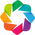

RECIPE: makeProcessedBias
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         .
      .
      PRIMITIVE: standardizeWCS
      -------------------------
      .
   .
   PRIMITIVE: addDQ
   ----------------
   No BPMs found for S20180423S005

In [6]:
reduce_bias = Reduce()
reduce_bias.files.extend(list_biases)
reduce_bias.runr()

caldb.add_cal(reduce_bias.output_filenames[0]) 

reduce_flats = Reduce()
reduce_flats.files.extend(list_flats)
reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0]) 

<a class="anchor" id="reducesci"></a>
# Producir la imagen científica reducida y apilada final
En este paso, se sigue el protocolo estándar de reducción de datos de DRAGONS GMOS: primero, se procesan las imágenes científicas y se crea una imagen combinada cruda que luego se utiliza para corregir aún más por flat y rechazar rayos cósmicos (RC) en las imágenes científicas de entrada. Estas imágenes de entrada más procesados y oscilados se vuelven a combinar para maximizar la relación señal-ruido y producir una imagen científica combinado final. *Nota: Este proceso es iterativo: primero, detecta fuentes en imágenes individuales, correlacionadas de forma cruzada para ver cuáles tienen coincidencia cruzada (no RC) y también las utiliza para derivar compensaciones y corregir RC. Se crea una imagen de cielo combinada (la mediana, sin rechazo), que luego se resta de cada imagen; el marco científico final se crea después de la corrección de RC y restando el cielo a los archivos de entrada, usando combinación = la media y rechazo sigclip*

In [7]:
reduce_science = Reduce()
reduce_science.files.extend(list_science)
reduce_science.runr()

All submitted files appear valid:
S20180419S0098.fits ... S20180419S0102.fits, 5 files submitted.
RECIPE: reduce
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         Updating keywords that are specific to GMOS
         .
      .
      PRIMITIVE: standardizeWCS
      -------------------------


<a class="anchor" id="displaysci"></a>
# Mostrar la imagen completamente reducida

Lea el espectro reducido con astropy e imprima información sobre las diversas extensiones `FITS` proporcionadas por la reducción de datos `DRAGONS`. Lea también el `WCS` (Sistema de coordenadas mundial) para fines de graficado.

In [8]:
image_file = "S20180419S0098_image.fits"
hdu_list = fits.open(image_file)
wcs = WCS(hdu_list[1].header)
hdu_list.info()

WARNING - FITSFixedWarning: 'datfix' made the change 'Set DATE-OBS to '2018-04-19T03:27:58.541' from MJD-OBS'.


Filename: S20180419S0098_image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     250   ()      
  1  SCI           1 ImageHDU       148   (3245, 2182)   float32   
  2  VAR           1 ImageHDU       148   (3245, 2182)   float32   
  3  DQ            1 ImageHDU       148   (3245, 2182)   int16 (rescales to uint16)   
  4  HISTORY       1 BinTableHDU     17   18R x 4C   [128A, 288A, 28A, 28A]   
  5  PROVENANCE    1 BinTableHDU     17   7R x 4C   [28A, 128A, 128A, 128A]   


Obtenga datos `(x,y)` de la extensión `SCI` e imprima la forma de la matriz

In [9]:
image_data = fits.getdata(image_file, ext=1)
print(image_data.shape)

(2182, 3245)


Muestre la imagen utilizando rutinas estándar matplotlib.pyplot. Tenga en cuenta el uso de `WCS` para las coordenadas. La función `norm=LogNorm` se utiliza para mejorar el contraste de la imagen.

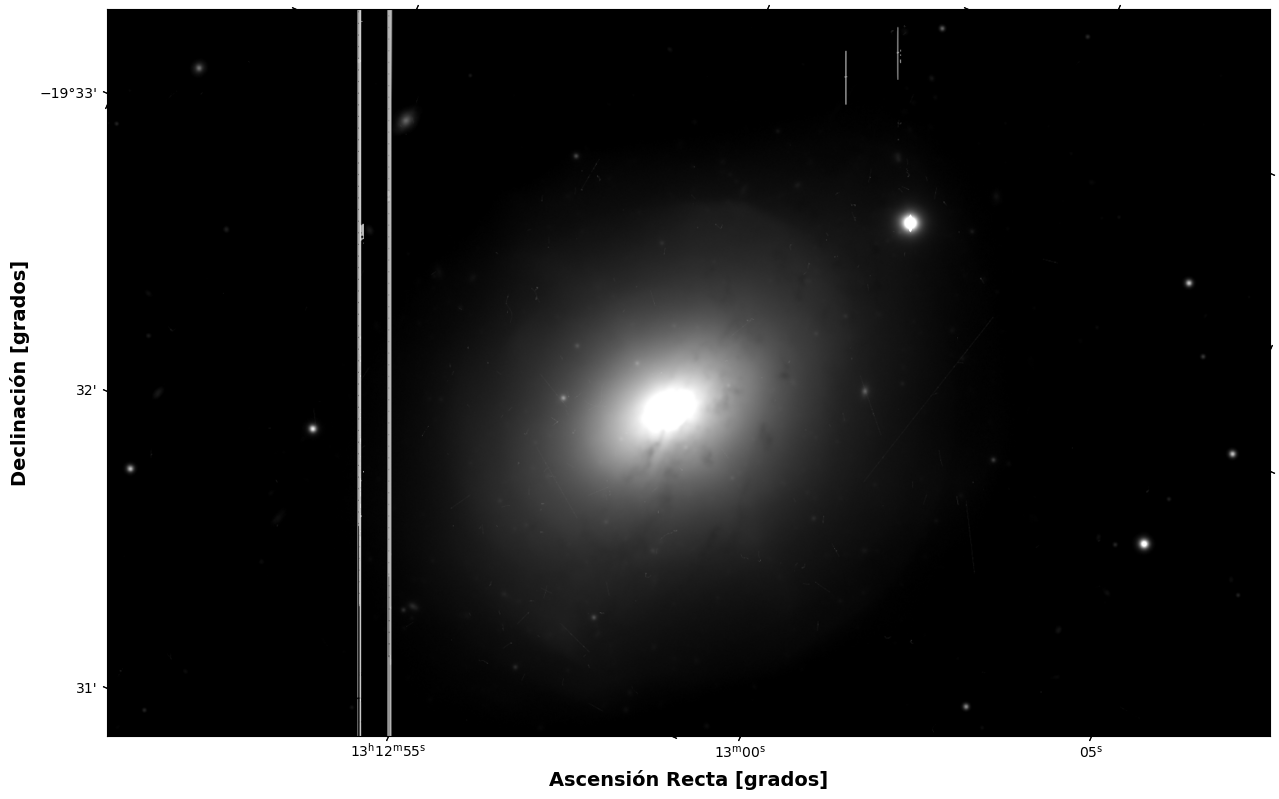

In [10]:
plt.figure(figsize = (15,15))
plt.subplot(projection=wcs)
plt.imshow(image_data,cmap='gray',norm=LogNorm(vmin=3000, vmax=60000))
plt.xlabel('Ascensión Recta [grados]',fontsize=14,fontweight='bold')
plt.ylabel('Declinación [grados]',fontsize=14,fontweight='bold')
plt.xlim(900,2500)
plt.ylim(1600,600)
plt.show()

<a class="anchor" id="Clean-up"></a>
# Limpieza (opcional)

Borre todos los archivos fits, listas, registros y calibraciones creados durante la reducción. Para eso, descomente todas las líneas en la celda a continuación y ejecútela.

In [11]:
%%bash

rm -f *S2018*.fits gmos.list reduce.log # eliminar archivos
rm -rf calibrations/ # eliminar directorios

<a class="anchor" id="res"></a>
# Recursos

* Tutoriales de DRAGONS de ONG de EE. UU.: https://gitlab.com/nsf-noirlab/csdc/usngo/DRAGONS_tutorials/

* Tutorial de DRAGONS de la ONG estadounidense en el que se basa este ejemplo: https://gitlab.com/nsf-noirlab/csdc/usngo/DRAGONS_tutorials/-/blob/main/GMOS_IM_FIELD.ipynb

* Lista de manuales y tutoriales de Gemini DRAGONS: https://dragons.readthedocs.io/en/v3.1.0/

* Tutorial de reducción de datos de imágenes Gemini DRAGONS GMOS:
https://dragons.readthedocs.io/projects/gmosimg-drtutorial/en/v3.1.0/

* Enlace del archivo Gemini al programa del que se obtuvieron estos datos:
https://archive.gemini.edu/programinfo/GS-2018A-Q-207

* Enlaces generales de DataLab/Jupyter Notebook/python:
    * https://datalab.noirlab.edu/start.php
    * https://docs.python.org/3/tutorial/index.html
    * https://jupyter.org/


